In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

<h3>Load the data</h3>

In [2]:
iris = load_iris(as_frame=True)
df = pd.concat([iris.data, iris.target], axis=1)
df = df[df['target'].isin([0, 1])]

In [3]:
X = df[['sepal length (cm)', 'petal length (cm)']].values
y = df['target'].values

In [4]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


### Visualize

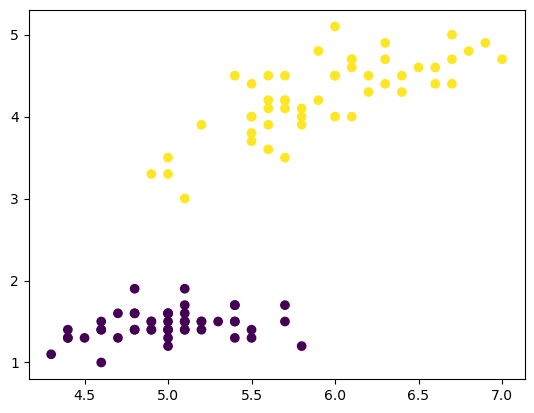

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y);

- As can be seen, linear decision boundary can perfectly separate the classes.

### Train-test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(80, 2)
(80,)
(20, 2)
(20,)
(array([0, 1]), array([40, 40]))
(array([0, 1]), array([10, 10]))


<h3>Perceptron class</h3>

In [8]:
class Perceptron:
    """
    Perceptron classifier
    
    Parameters
    ----------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset
    random_state : int
      Random number generator seed for random weight
    
    Attributes
    ----------
    w_ : 1D-array
      Weights after fitting (optimization)
    b_ : scalar
      Bias (intercept) after fitting (optimization)
    errors_ : list
      Number of missclassifications in each epoch
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float64(0.0)
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ = self.w_ + update * xi
                self.b_ = self.b_ + update
                errors += int(update != 0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return X @ self.w_ + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, 0)

In [9]:
clf = Perceptron(eta=0.1, n_iter=10)
clf.fit(X_train, y_train)

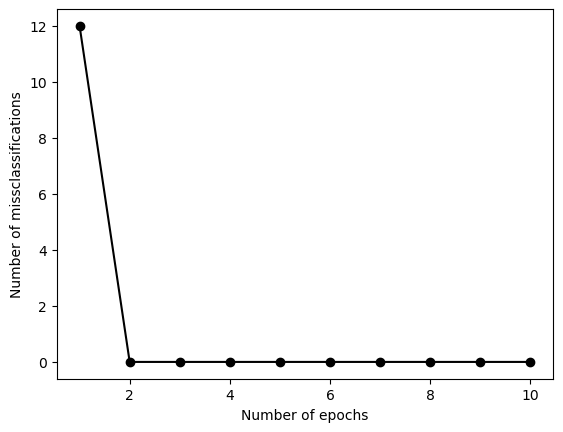

In [10]:
plt.plot(range(1, len(clf.errors_) + 1), clf.errors_, color='black', marker='o')
plt.xlabel('Number of epochs')
plt.ylabel('Number of missclassifications');

In [16]:
def plot_decision_boundary(X, y, clf):
    fig, ax = plt.subplots(figsize=(8,6))
    
    # Create a meshgrid
    x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
    y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    
    # Make a prediction on every grid point
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Blues)
    
    # Define markers and colors for each class
    markers = ['o', '^']
    colors = ['black', 'orange']
    
    # Plot the original data (each class with a different marker and color)
    for i, label in enumerate(np.unique(y)):
        X_sub = X[y == label]
        ax.scatter(X_sub[:,0], X_sub[:,1], marker=markers[i], color=colors[i])
    ax.set_xlabel('Sepal length (cm)')
    ax.set_ylabel('Petal length (cm)')
    ax.set_title('Perceptron classifier decision boundary')
    plt.tight_layout();

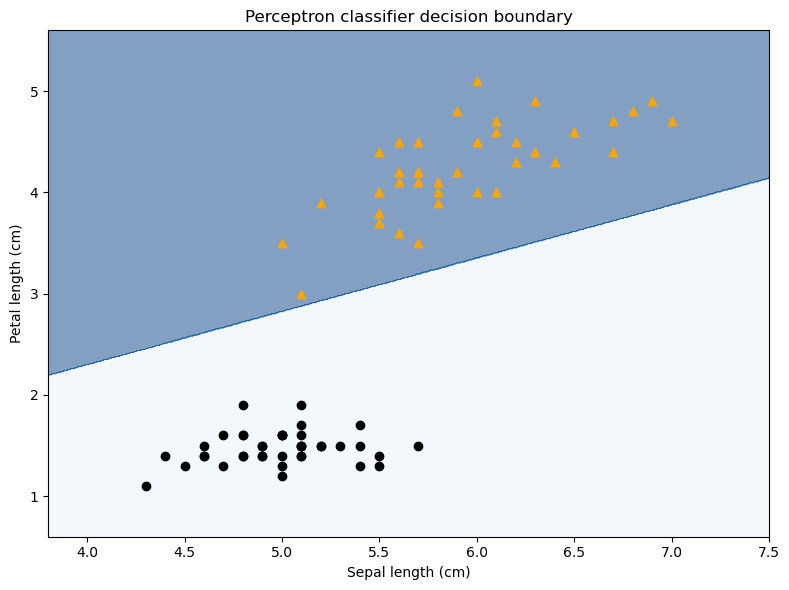

In [18]:
plot_decision_boundary(X=X_train, y=y_train, clf=clf)

In [23]:
(clf.predict(X_train) == y_train).sum() / len(y_train)

np.float64(1.0)

- Perfect training accuracy.

In [25]:
(clf.predict(X_test) == y_test).sum() / len(y_test)

np.float64(1.0)

- Perfect test accuracy.